In [99]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots

In [100]:
W = zeros(5000,5000)
#W[:,498:502] .= 1e3
W[:,2500] .= .1e6
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 100e3, ncores=6);
#heatmap(I)#-1e15)  )#- IsoFlex.flexural(W))

8.88888888888889e24
0

In [101]:
w_line1 = I[2500,:];

## Analytic solution comparisons
#### Basic line load - no in-plane stress


In [81]:
pm = 3300
pc = 2750
Te = 100e3
v = .25
Nx = 1000 * 2750 * .1e6 * 9.81 * 300
E = 100e9
g = 9.81
D0 = E * Te^3 / (12 * (1 - v ^ 2))
dRho = pm-pc
V0 = 1000 * 2750 * 1000*100 * 9.81 #* 3300/(3300-2750) #(3300/(3300-2750)) #load .1e6 meter * density 2750 *  g * 1000m (x-)

beta =  ((3300 * g / (4*D0)) ^ .5 + (Nx / (4*D0))) ^ -.5
gamma = ((3300 * g / (4*D0)) ^ .5 - (Nx / (4*D0))) ^ -.5
alpha = (4 * D0 / (3300 * g)) ^ .25

we = V0 / (2 * alpha^2 * 3300 * g) 
wl = V0 * alpha^3 / (8* D0 )

x = float(collect(-5e6/2:1000:5e6/2-1000))
w0 = real(wl * exp.( - abs.(x) ./ alpha ) .* ( cos.( x ./ alpha ) .+ sin.(abs.(x) ./ alpha) ));
w = real(we * exp.( .- abs.(x) ./ beta ) .* ( beta .* cos.( x ./ gamma ) .+ gamma .* sin.(abs.(x) ./ gamma) ));

In [82]:
gamma/beta

2.672441649923266

In [96]:
V0 * ((4 * 2.4e23/(9.81*3300)).^.25 )^3 / (8 * 2.4e23)

5.646335589597233

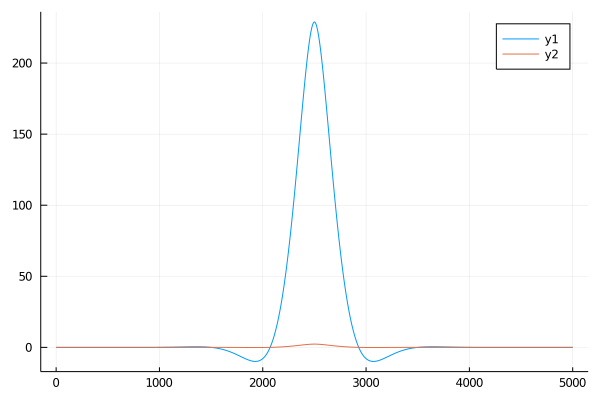

In [91]:
#plot(w0)
plot(w_line)
plot!(w0)

## In - plane 

In [67]:
W = zeros(5000,5000)
W[:,2500] .= .1e6
I = IsoFlex.flexural(W, Nx = 000 * 2750 * .1e6 * 9.81*300, Ny = 0, Nxy = 1000*2750*.1e6 * 9.81 * 100, dx=1000, dy=1000, Te = 100e3, ncores=6);
w_line = I[2500,:];
I = IsoFlex.flexural(W, Nx = 1000 * 2750 * .1e6 * 9.81*300, Ny = 0, Nxy = 000*2750*.1e6 * 9.81 * 100, dx=1000, dy=1000, Te = 100e3, ncores=6);
w_line1 = I[2500,:];

8.88888888888889e24
2.69775e148.88888888888889e24
0.0

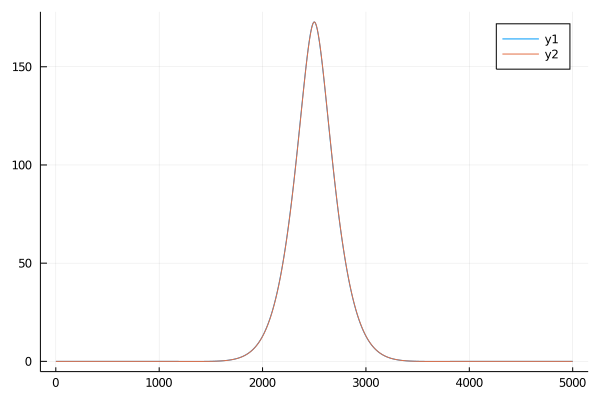

In [68]:
#plot(w0)
#plot(w_line)
plot(w_line1)
plot!(w)

In [55]:
W = zeros(5000,5000)
W[1:5000+1:end] .= 1e3
# W[:,2500] .= .1e6
I = IsoFlex.flexural(W, Ny = 0, Nxy = 1000*2750*.1e6*9.81*300, dx=1000, dy=1000, Te = 100e3, ncores=6);
w_line = I[2500,:];

8.88888888888889e24
8.09325e14

In [56]:
W = zeros(5000,5000)
W[1:5000+1:end] .= 1e3
# W[:,2500] .= .1e6
I = IsoFlex.flexural(W, Ny = 0, Nxy = 0*2750*.1e6*9.81*-300, dx=1000, dy=1000, Te = 100e3, ncores=6);
w_line1 = I[2500,:];

8.88888888888889e24
-0.0

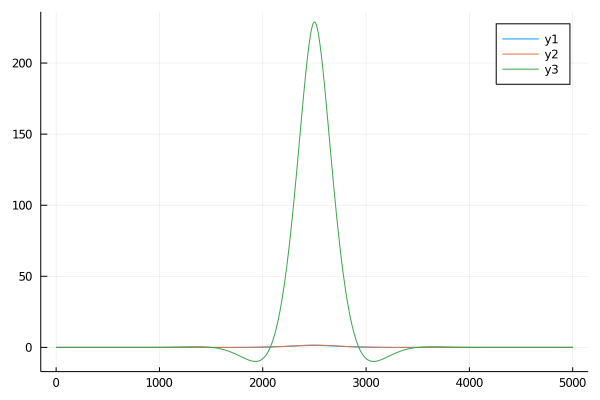

In [46]:
#plot(w0)
plot(w_line)
plot!(w_line1)
plot!(w0)

## Movie

0

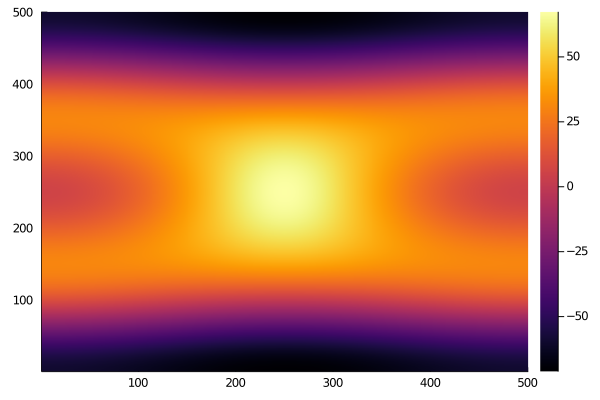

In [737]:
W = zeros(500,500)
W[200:300, 200:300] .= 100
# W[:,2500] .= .1e6
I = IsoFlex.flexural(W, Nx = 0, Ny = -1000*2750*1e6*9.81*7, dx=1000, dy=1000, Te = 30e3, ncores=6);
heatmap(I)

000000000000

┌ Info: Saved animation to 
│   fn = /Users/gr_1/Documents/IsoFlex/anim_fps15.gif
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/Users/gr_1/Documents/IsoFlex/anim_fps15.gif")
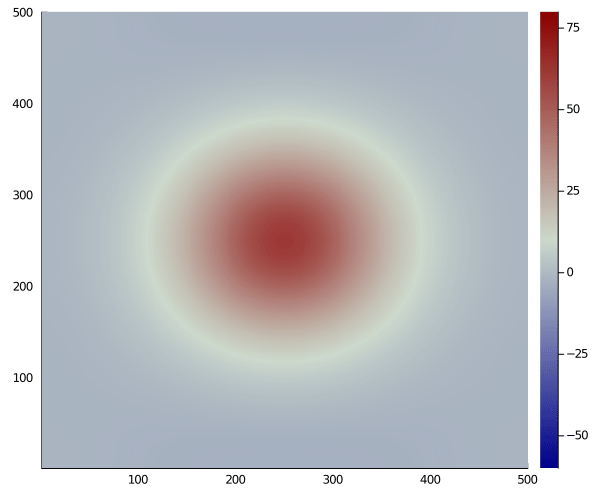

In [751]:

cs = cat(float(collect(1:6)), float(collect(6:-1:1)), dims=1)

anim = @animate for i = 1:length(cs)
    I = IsoFlex.flexural(W*2, Nx = 0, Ny = -1000*2750*1e6*9.81*cs[i], dx=1000, dy=1000, Te = 30e3, ncores=6);
    heatmap(I,clim=(-60, 80),c=:bluesreds)
    plot!(size=(600,500))
end 
gif(anim, "anim_fps15.gif", fps = 7)

In [721]:
cs

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0], [30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0  …  10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0])